In [1]:
import datetime
mth_now = datetime.datetime.now().month
print("오늘 날짜:", datetime.datetime.now().date())

오늘 날짜: 2022-06-29


# 데이터

In [2]:
from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from keras.applications.vgg16 import VGG16 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from random import randint
import pickle

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
def kinds_of():
  select=int(input("남성이십니까 여성이십니까? 남자는 1번/여자는 2번"))
  if (select ==1):
    select_1 = int(input("어떤 스타일을 원하시나요? 아메리칸캐주얼은 1번, 캐주얼은 2번, 댄디는 3번, 포멀은 4번, 골프는 5번, 스포츠는 6번, 스트릿은 7번"))
    if(select_1 ==1):
      %cd /content/drive/MyDrive/muchunzang cloth/남성아메리칸캐주얼_images_1
    elif(select_1==2):
      %cd /content/drive/MyDrive/muchunzang cloth/남성캐주얼_images_1
    elif(select_1==3):
      %cd /content/drive/MyDrive/muchunzang cloth/남성댄디_images_1
    elif(select_1==4):
      %cd /content/drive/MyDrive/muchunzang cloth/남성포멀_images_1
    elif(select_1==5):
      %cd /content/drive/MyDrive/muchunzang cloth/남성골프_images_1
    elif(select_1==6):
      %cd /content/drive/MyDrive/muchunzang cloth/남성스포츠_images_1
    elif(select_1==7):
      %cd /content/drive/MyDrive/muchunzang cloth/남성스트릿_images_1
  else:
    select_2 = int(input("어떤 스타일을 원하시나요? 걸리시는 1번 골프는 2번 레트로는 3번, 로맨틱은 4번, 스트릿은 5번, 스포츠는 6번, 시크는 7번, 캐주얼은 8번, 포멀은 9번"))
    if(select_2 ==1):
      %cd /content/drive/MyDrive/muchunzang cloth/여성걸리시_images_1
    elif(select_2==2):
      %cd /content/drive/MyDrive/muchunzang cloth/여성골프_images_1
    elif(select_2==3):
      %cd /content/drive/MyDrive/muchunzang cloth/여성레트로_images_1
    elif(select_2==4):
      %cd /content/drive/MyDrive/muchunzang cloth/여성로맨틱_images_1
    elif(select_2==5):
      %cd /content/drive/MyDrive/muchunzang cloth/여성스트릿_images_1
    elif(select_2==6):
      %cd /content/drive/MyDrive/muchunzang cloth/여성스포츠_images_1
    elif(select_2==7):
      %cd /content/drive/MyDrive/muchunzang cloth/여성시크_images_1
    elif(select_2==8):
      %cd /content/drive/MyDrive/muchunzang cloth/여성캐주얼_images_1
    elif(select_2==9):
      %cd /content/drive/MyDrive/muchunzang cloth/여성포멀_images_1

In [17]:
fashion=[]
for file in os.listdir():
    if mth_now in range(3,6):
        if file[-9:-7] in ["03","04","05"]:
            fashion.append(file)
    elif mth_now in range(6,9):
        if file[-9:-7] in ["06","07","08"]:
            fashion.append(file)
    elif mth_now in range(9,12):
        if file[-9:-7] in ["09","10","11"]:
            fashion.append(file)
    else:
        if file[-9:-7] in ["12","01","02"]:
            fashion.append(file)

In [23]:
fashion[:10]

225

# 옷 업로드해서 코디 추천받기

In [9]:
def my_clothes_codi(myclothes):
    files=fashion.copy()
    
    files.insert(0, myclothes)
    
    # parameters setup
    imgs_model_width, imgs_model_height = 224, 224
    # number of most similar images to retrieve
    nb_closest_images = 5
    # load the model
    vgg_model = vgg16.VGG16(weights='imagenet')
    # remove the last layers in order to get features instead of predictions
    feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)
    
        
    # load all the images and prepare them for feeding into the CNN

    importedImages = []

    for f in files:
        filename = f
        original = load_img(filename, target_size=(224, 224))
        numpy_image = img_to_array(original)
        image_batch = np.expand_dims(numpy_image, axis=0)

        importedImages.append(image_batch)

    images = np.vstack(importedImages)
    processed_imgs = preprocess_input(images.copy())

    # extract the images features
    imgs_features = feat_extractor.predict(processed_imgs)
    
    # compute cosine similarities between images
    cosSimilarities = cosine_similarity(imgs_features)
    
    # store the results into a pandas dataframe
    cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
    
    print("-----------------------------------------------------------------------")
    print("original product:")

    original = load_img(myclothes, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar products:")

    closest_imgs = cos_similarities_df[myclothes].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[myclothes].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

이미지 파일 경로를 입력하세요: C:\Users\82103\Desktop/example12.jpg
-----------------------------------------------------------------------
original product:


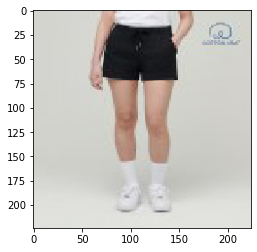

-----------------------------------------------------------------------
most similar products:


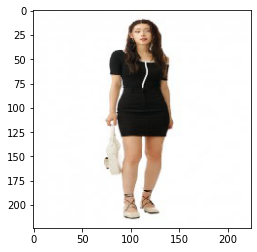

similarity score :  0.76657385


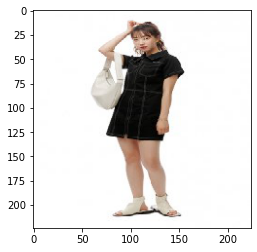

similarity score :  0.7266003


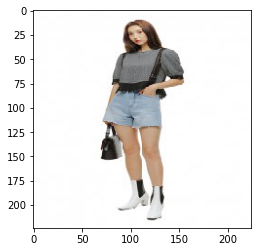

similarity score :  0.6926117


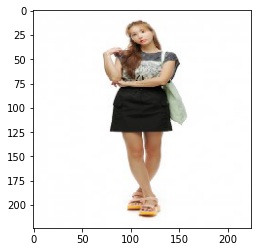

similarity score :  0.66997814


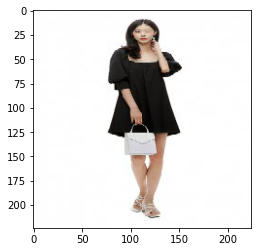

similarity score :  0.66575205


In [ ]:
img=input("이미지 파일 경로를 입력하세요: ")
my_clothes_codi(img)

# 맘에 드는 코디 선택하고 비슷한 코디 추천받기

In [24]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [25]:
def show_codi():
    files=fashion.copy()

    # parameters setup
    imgs_model_width, imgs_model_height = 224, 224
    # number of most similar images to retrieve
    nb_closest_images = 5
    # load the model
    vgg_model = vgg16.VGG16(weights='imagenet')
    # remove the last layers in order to get features instead of predictions
    feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)
    
        
    # load all the images and prepare them for feeding into the CNN

    importedImages = []

    for f in files:
        filename = f
        original = load_img(filename, target_size=(224, 224))
        numpy_image = img_to_array(original)
        image_batch = np.expand_dims(numpy_image, axis=0)

        importedImages.append(image_batch)

    images = np.vstack(importedImages)
    processed_imgs = preprocess_input(images.copy())

    # extract the images features
    imgs_features = feat_extractor.predict(processed_imgs)
    
    #PCA
    pca_all=PCA(n_components=len(files)-1)
    x = pca_all.fit_transform(imgs_features)
    
    
    aggmodel = AgglomerativeClustering(n_clusters=6, affinity='euclidean')
    aggmodel.fit(x)

    groups = {}
    for file, cluster in zip(files, aggmodel.labels_):
        if cluster not in groups.keys():
            groups[cluster] = []
            groups[cluster].append(file)
        else:
            groups[cluster].append(file)
            
            
    plt.figure(figsize = (10,10))
    for i in range(0,6):
        plt.subplot(2, 3, i+1) 
        img=load_img(groups[i][0])
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')
        plt.title('Group'+ str(i+1))
            
    return groups

In [26]:
def recom_codi(groups, select):
    results=groups[select-1]
    
    plt.figure(figsize = (30,30))
    # only allow up to 30 images to be shown at a time
    if len(results) > 30:
        print(f"Clipping cluster size from {len(results)} to 30")
        results = results[:29]
    # plot each image in the cluster
    for index, f in enumerate(results):
        plt.subplot(10,10,index+1);
        img = load_img(f)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

In [ ]:
groups=show_codi()

어떤 코디를 선택하시겠습니까? 6


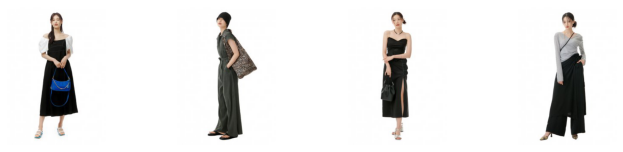

In [ ]:
select=int(input("어떤 코디를 선택하시겠습니까? "))
recom_codi(groups, select)

In [13]:
def start():
  start = int(input("옷 업로드해서 추천받기는 1번 / 코디 선택해서 추천 받기는 2번"))
  if(start ==1):
    kinds_of()
    img=input("이미지 파일 경로를 입력하세요: ")
    my_clothes_codi(img)
  else:
    kinds_of()
    groups=show_codi()
    select=int(input("어떤 코디를 선택하시겠습니까? "))
    recom_codi(groups, select)

In [15]:
start()

옷 업로드해서 추천받기는 1번 / 코디 선택해서 추천 받기는 2번2
남성이십니까 여성이십니까? 남자는 1번/여자는 2번2
어떤 스타일을 원하시나요? 걸리시는 1번 골프는 2번 레트로는 3번, 로맨틱은 4번, 스트릿은 5번, 스포츠는 6번, 시크는 7번, 캐주얼은 8번, 포멀은 9번4
/content/drive/MyDrive/muchunzang cloth/여성로맨틱_images_1
553476096/553467096 [==============================] - 4s 0us/step


ValueError: ignored